In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)


In [6]:
trader_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')


In [7]:

trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
trader_df['Date'] = trader_df['Timestamp IST'].dt.date

sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

trader_df = trader_df[trader_df['Date'].notnull()]


In [8]:
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'classification']], on='Date', how='inner')

merged_df.to_csv('csv_files/merged_trader_sentiment.csv', index=False)


merged_df[['Account', 'Coin', 'Closed PnL', 'Side', 'Date', 'classification']].head()


,Account,Coin,Closed PnL,Side,Date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,BUY,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,BUY,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,BUY,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,BUY,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,BUY,2024-02-12,Greed


In [9]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')

avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
total_volume = merged_df.groupby('classification')['Size USD'].sum()

print("Average PnL by Sentiment:\n", avg_pnl)
print("\nTotal Volume by Sentiment:\n", total_volume)


Average PnL by Sentiment:
 classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64

Total Volume by Sentiment:
 classification
Extreme Fear      9580240.04
Extreme Greed    18223760.27
Fear             79674391.06
Greed            57045815.74
Neutral          11939551.21
Name: Size USD, dtype: float64


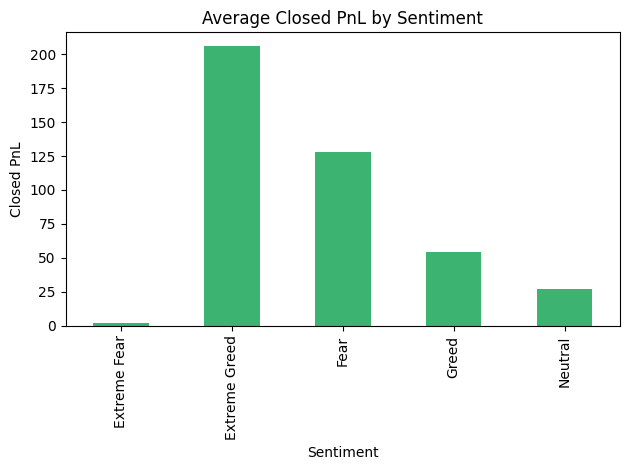

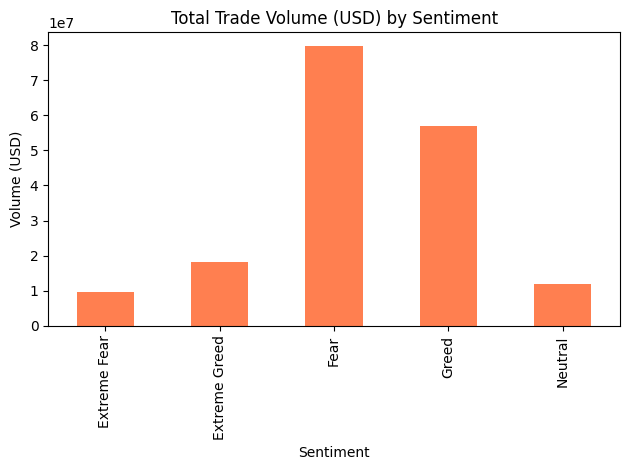

In [10]:
avg_pnl.plot(kind='bar', color='mediumseagreen')
plt.title('Average Closed PnL by Sentiment')
plt.ylabel('Closed PnL')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.savefig('outputs/avg_pnl_by_sentiment.png')
plt.show()

total_volume.plot(kind='bar', color='coral')
plt.title('Total Trade Volume (USD) by Sentiment')
plt.ylabel('Volume (USD)')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.savefig('outputs/volume_by_sentiment.png')
plt.show()


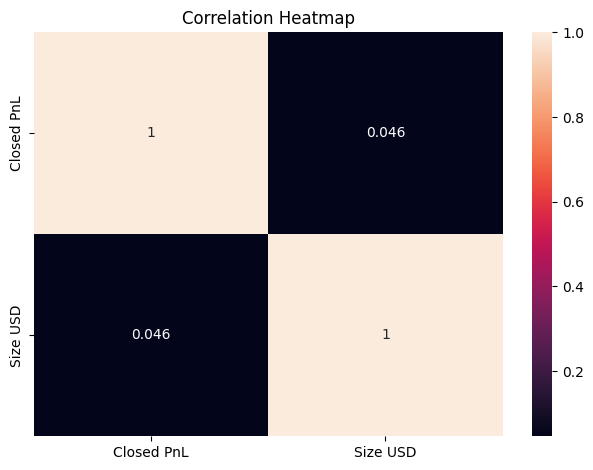

In [11]:
sns.heatmap(merged_df[['Closed PnL', 'Size USD']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig('outputs/correlation_heatmap.png')
plt.show()
